In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
cpi=pd.read_excel("./Datasets/tuketici fiyat endeksi (2003=100).xls")
#print(cpi[cpi['Tüketici fiyat endeks rakamları (2003=100)']=='Annual rate of change (%)'])
#print(cpi.iloc[76:98])
inflation=cpi.iloc[79:98]
inflation=pd.DataFrame(inflation)

inflation.iloc[18,11]=83
inflation.iloc[18,12]=64



## Data Preparation

In [9]:


inflation = inflation.set_axis(["Yil","Ocak","Şubat","Mart","Nisan","Mayis","Haziran","Temmuz","Ağustos","Eylül","Ekim","Kasim","Aralik"], axis=1, inplace=False)
inflation

,Yil,Ocak,Şubat,Mart,Nisan,Mayis,Haziran,Temmuz,Ağustos,Eylül,Ekim,Kasim,Aralik
79,2004,10.59,9.48,8.4,7.87,7.31,7.08,7.79,8.45,8.01,9.43,9.47,9.35
80,2005,9.23,8.69,7.94,8.18,8.7,8.95,7.82,7.91,7.99,7.52,7.61,7.72
81,2006,7.93,8.15,8.16,8.83,9.86,10.12,11.69,10.26,10.55,9.98,9.86,9.65
82,2007,9.93,10.16,10.86,10.72,9.23,8.6,6.9,7.39,7.12,7.7,8.4,8.39
83,2008,8.17,9.1,9.15,9.66,10.74,10.61,12.06,11.77,11.13,11.99,10.76,10.06
84,2009,9.5,7.73,7.89,6.13,5.24,5.73,5.39,5.33,5.27,5.08,5.53,6.53
85,2010,8.19,10.13,9.56,10.19,9.1,8.37,7.58,8.33,9.24,8.62,7.29,6.4
86,2011,4.9,4.16,3.99,4.26,7.17,6.24,6.31,6.65,6.15,7.66,9.48,10.45
87,2012,10.61,10.43,10.43,11.14,8.28,8.87,9.07,8.88,9.19,7.8,6.37,6.16
88,2013,7.31,7.03,7.29,6.13,6.51,8.3,8.88,8.17,7.88,7.71,7.32,7.4


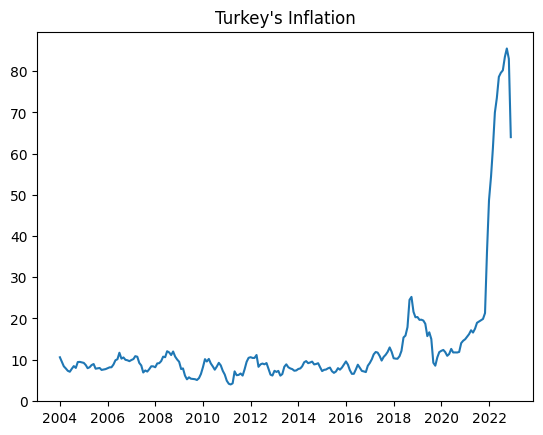

In [10]:
dates=pd.date_range('2004-01-01','2023-01-01' , freq='1M')-pd.offsets.MonthBegin(1)
df=pd.DataFrame()
del inflation["Yil"]
v=np.array(inflation.values)
v=v.flatten()
df["Inflation"]=v
df=df.set_index(dates)
plt.figure()
plt.title("Turkey's Inflation")

plt.plot(df)
plt.show()


In [17]:
df['TIME']=df.index


In [18]:
df['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df['TIME'] =  pd.to_datetime(df['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df = df.set_index(['TIME'])

In [21]:
df.columns=["Value"]
df

,Value
TIME,
2004-01-01,10.59
2004-02-01,9.48
2004-03-01,8.4
2004-04-01,7.87
2004-05-01,7.31
...,...
2022-08-01,80.21
2022-09-01,83.45
2022-10-01,85.51


In [22]:

from statsmodels.tsa.stattools import adfuller
def testStationarity(ts):
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

testStationarity(df.Value)

Test Statistic                  -0.600143
p-value                          0.870950
#Lags Used                      15.000000
Number of Observations Used    212.000000
Critical Value (1%)             -3.461578
Critical Value (5%)             -2.875272
Critical Value (10%)            -2.574089
dtype: float64

In [23]:
#Import Arima Model
from pmdarima.arima import auto_arima

results = auto_arima(df, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1134.006, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=993.023, Time=0.48 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.28 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1104.650, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=936.651, Time=0.66 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.12 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.05 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1023.890, Time=0.46 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=933.869, Time=0.87 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=992.329, Time=0.76 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=7.86 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=3.36 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=931.815, Time=1.18 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=983.558, Ti

In [24]:
#Import Sarima Model
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df.astype(float),
                                order=(1,1,2),
                                seasonal_order=(2,1,0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()


c:\Users\Bora\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [25]:
pred = results.get_prediction(start=pd.to_datetime('2016-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [26]:
pred_ci['Predicted'] = (pred_ci['lower Value'] + pred_ci['upper Value'])/2
pred_ci['Observed'] = df['Value']
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Value,upper Value,Predicted,Observed,"Diff, %%"
2022-03-01,54.101560,62.026551,58.064055,61.14,-5.030986
2022-04-01,61.297070,69.222061,65.259565,69.97,-6.732078
2022-05-01,72.620050,80.545041,76.582546,73.5,4.19394
2022-06-01,68.837124,76.762115,72.799619,78.62,-7.403181
2022-07-01,80.398073,88.323064,84.360569,79.6,5.980614
2022-08-01,73.326463,81.251454,77.288959,80.21,-3.641742
2022-09-01,74.878118,82.803109,78.840614,83.45,-5.52353
2022-10-01,83.947480,91.872471,87.909975,85.51,2.80666
2022-11-01,84.213319,92.138310,88.175814,83,6.235921
2022-12-01,71.602731,79.527723,75.565227,64,18.070667


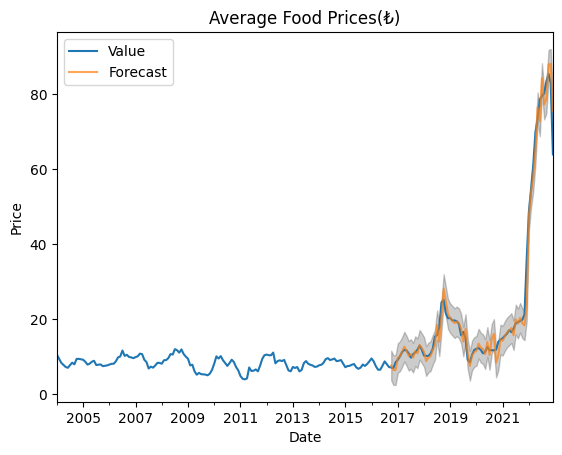

In [27]:
ax = df['2003':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Average Food Prices(₺)")
plt.legend()
plt.show()

In [29]:
# Get forecast
pred_uc = results.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

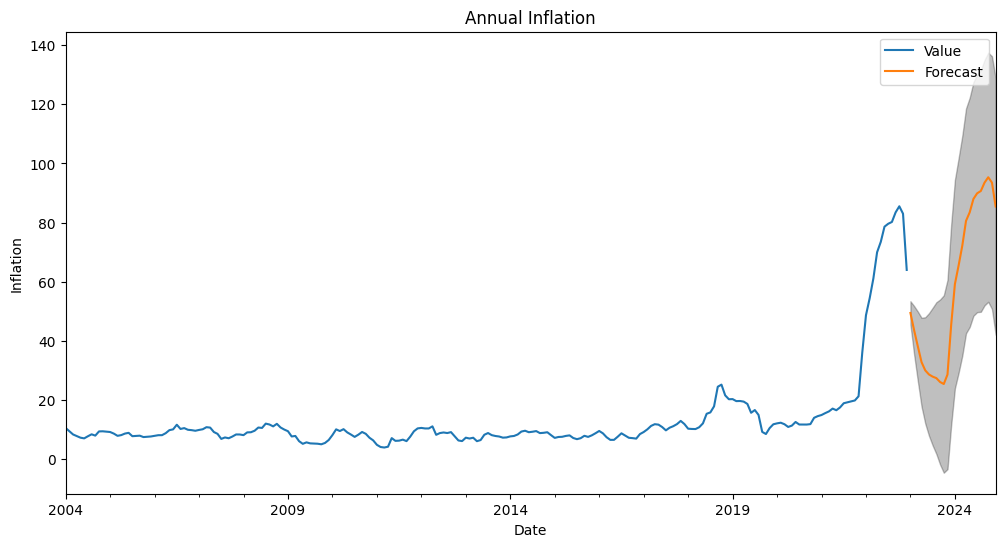

In [30]:
ax = df.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.title("Annual Inflation")

plt.legend()

plt.show()

In [31]:
pred_ci

,lower Value,upper Value
2023-01-01,45.490120,53.415111
2023-02-01,35.384266,51.790397
2023-03-01,26.394613,49.916293
2023-04-01,17.840281,47.817008
2023-05-01,12.095804,48.011263
2023-06-01,7.969588,49.380004
2023-07-01,4.681602,51.198661
2023-08-01,1.795340,53.078564
2023-09-01,-1.748040,54.002875
2023-10-01,-4.529399,55.427410


Text(0.5, 1.0, 'Inflation')

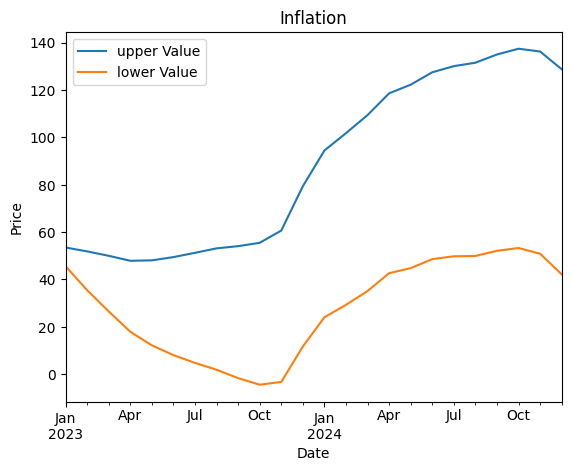

In [32]:
pred_ci[["upper Value","lower Value"]].head(24).plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Inflation")

In [33]:
pred_ci['Mean'] = (pred_ci['lower Value'] + pred_ci['upper Value'])/2

In [34]:
pred_ci['Mean'].head(24)

2023-01-01    49.452615
2023-02-01    43.587331
2023-03-01    38.155453
2023-04-01    32.828644
2023-05-01    30.053533
2023-06-01    28.674796
2023-07-01    27.940131
2023-08-01    27.436952
2023-09-01    26.127418
2023-10-01    25.449005
2023-11-01    28.641446
2023-12-01    45.486835
2024-01-01    59.197253
2024-02-01    65.485719
2024-03-01    72.212890
2024-04-01    80.569444
2024-05-01    83.478211
2024-06-01    87.981899
2024-07-01    89.886356
2024-08-01    90.674376
2024-09-01    93.499027
2024-10-01    95.309744
2024-11-01    93.513169
2024-12-01    85.428400
Freq: MS, Name: Mean, dtype: float64

<AxesSubplot:>

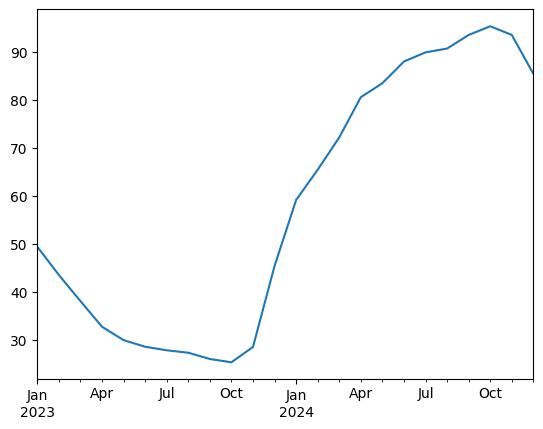

In [35]:
pred_ci["Mean"].plot()

In [36]:
currency=pd.read_csv("./Datasets/USD_TRY Geçmiş Verileri.csv")
currency

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,01.01.2004,"1,3410","1,4035","1,4045","1,3090",NaN,"-4,39%"
1,01.02.2004,"1,3270","1,3380","1,3630","1,3020",NaN,"-1,04%"
2,01.03.2004,"1,3135","1,3265","1,3375","1,3070",NaN,"-1,02%"
3,01.04.2004,"1,4206","1,3106","1,4576","1,3036",NaN,"8,15%"
4,01.05.2004,"1,4895","1,4185","1,5755","1,4125",NaN,"4,85%"
...,...,...,...,...,...,...,...
222,01.07.2022,"17,9114","16,6968","18,0470","16,5898",NaN,"7,30%"
223,01.08.2022,"18,1868","17,9084","18,3530","17,6443",NaN,"1,54%"
224,01.09.2022,"18,5000","18,1976","18,6262","18,0980",NaN,"1,72%"
225,01.10.2022,"18,5920","18,4895","18,7200","18,3515",NaN,"0,50%"


In [37]:
df1=pd.DataFrame()
df1["USD/TL"]=currency["Şimdi"]
df1=df1.applymap(lambda x: str(x.replace(',','.')))
df1["USD/TL"]=df1["USD/TL"].astype(float)


In [38]:
dates= pd.date_range('2004-01-01','2022-12-01' , freq='1M')-pd.offsets.MonthBegin(1)

            
df1=df1.set_index(dates)
df1


,USD/TL
2004-01-01,1.3410
2004-02-01,1.3270
2004-03-01,1.3135
2004-04-01,1.4206
2004-05-01,1.4895
...,...
2022-07-01,17.9114
2022-08-01,18.1868
2022-09-01,18.5000
2022-10-01,18.5920


<AxesSubplot:>

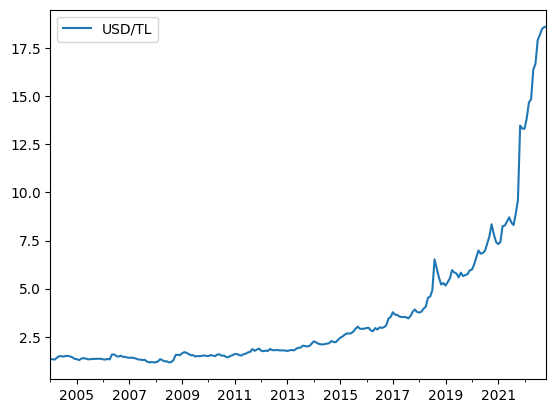

In [39]:
df1.plot()

In [40]:
#Cleaning the data
money_supply=pd.read_excel("./Datasets/EVDS.xlsx")
del money_supply['Unnamed: 2']
money_supply.columns={"Tarih","Para Arzi(Trilyon TL)"}
money_supply = money_supply.dropna(axis=0)
#Monthly money supply
money_supply=money_supply.drop([230,233])
money_supply["Para Arzi(Trilyon TL)"]=money_supply["Para Arzi(Trilyon TL)"]/1e+9
money_supply



,Tarih,Para Arzi(Trilyon TL)
23,2005-12,0.237949
24,2006-01,0.237353
25,2006-02,0.242389
26,2006-03,0.249486
27,2006-04,0.252192
...,...,...
222,2022-07,6.970334
223,2022-08,7.252514
224,2022-09,7.48966
225,2022-10,7.778385


In [41]:
dates=pd.date_range('2005-12-01','2022-12-01' , freq='1M')-pd.offsets.MonthBegin(1)
del money_supply["Tarih"]
money_supply

,Para Arzi(Trilyon TL)
23,0.237949
24,0.237353
25,0.242389
26,0.249486
27,0.252192
...,...
222,6.970334
223,7.252514
224,7.48966
225,7.778385


In [42]:
money_supply=money_supply.set_index(dates)
money_supply

,Para Arzi(Trilyon TL)
2005-12-01,0.237949
2006-01-01,0.237353
2006-02-01,0.242389
2006-03-01,0.249486
2006-04-01,0.252192
...,...
2022-07-01,6.970334
2022-08-01,7.252514
2022-09-01,7.48966
2022-10-01,7.778385


<AxesSubplot:>

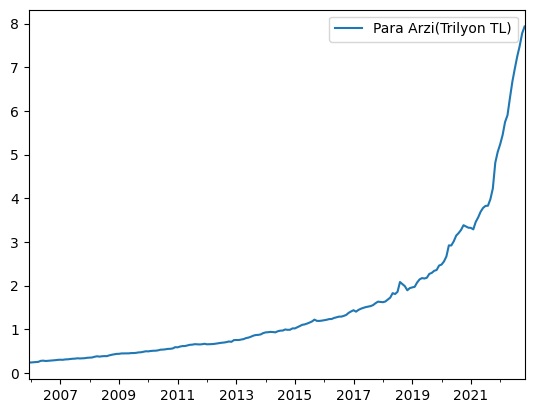

In [43]:
money_supply.plot()

In [44]:
#Cleaning the data
interest=pd.read_excel("./Datasets/TCMB Ortalama Fonlama Faizi ve Toplam Fonlama Miktar__.xlsx")
del interest['Unnamed: 2']
interest=pd.DataFrame(interest.iloc[:142])
interest

,Tarih,TP APIFON4
0,2011-01,6.25
1,2011-02,6.25
2,2011-03,6.25
3,2011-04,6.25
4,2011-05,6.25
...,...,...
137,2022-06,14.05
138,2022-07,14
139,2022-08,13
140,2022-09,12.04


In [45]:
del interest["Tarih"]
interest.columns={"Faiz"}
interest

,Faiz
0,6.25
1,6.25
2,6.25
3,6.25
4,6.25
...,...
137,14.05
138,14
139,13
140,12.04


In [46]:
#Creating a time serie
dates=pd.date_range('2011-01-01','2022-11-01' , freq='1M')-pd.offsets.MonthBegin(1)
interest=interest.set_index(dates)
interest

,Faiz
2011-01-01,6.25
2011-02-01,6.25
2011-03-01,6.25
2011-04-01,6.25
2011-05-01,6.25
...,...
2022-06-01,14.05
2022-07-01,14
2022-08-01,13
2022-09-01,12.04


<AxesSubplot:>

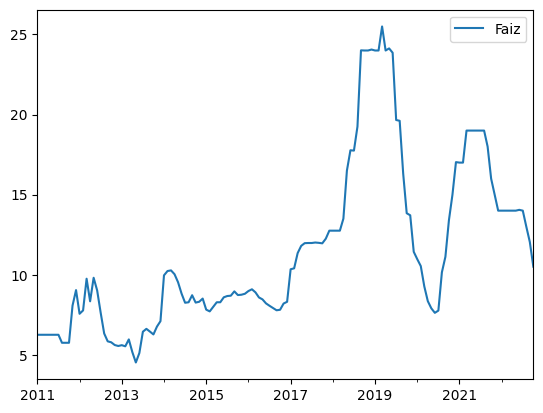

In [47]:
interest.plot()

Since the common start date of all datasets is 2011/01/01, we need to start each dataset from that date.

In [48]:
#Fitting Linear Regression Model
y = df.iloc[84:226]
y=np.array(y)
kur=np.array(df1.iloc[84:226])
para_arzi=np.array(money_supply.iloc[61:203])
faiz=np.array(pd.DataFrame(interest["Faiz"]))



import wbgapi as wb
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
para_arzi=para_arzi.astype(float)
faiz=faiz.astype(float)
X = np.concatenate((kur,para_arzi,faiz), axis=1)
y=y.astype(float)





In [49]:
XX = sm.add_constant(X)
Y = y
model = sm.OLS(Y,XX)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     265.5
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           4.18e-57
Time:                        16:26:24   Log-Likelihood:                -463.74
No. Observations:                 142   AIC:                             935.5
Df Residuals:                     138   BIC:                             947.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6767      1.350      1.242      0.2

In [50]:
linear_regression_score=0.852

## Decision Tree Regressor Model

In [51]:

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [52]:
X = pd.DataFrame()
X["Kur"]=pd.DataFrame(kur)
X["Para Arzi"]=pd.DataFrame(para_arzi)
X["Faiz"]=pd.DataFrame(faiz)


In [53]:
#Preparing test and train data
X_train_val, X_test, y_train_val, y_test = \
train_test_split(X, Y, test_size = 0.2, random_state = 0)
X_train,X_val,y_train,y_val=\
train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state = 0)

In [54]:
X_train=np.array(X_train) 
y_train=np.array(y_train)
X_val=np.array(X_val)
y_val=np.array(y_val)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [55]:
#Fitting model
import random
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_prediction = dtr.predict(X_test)
print("Decision Tree")
print(dtr.score(X_test, y_test))
decision_tree_score=dtr.score(X_test, y_test)


Decision Tree
0.991944763164438


## K-Means Model

In [56]:
X=X[['Kur','Para Arzi',"Faiz"]]


In [57]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

In [58]:
Y=pd.DataFrame(Y)
data=pd.concat([X,Y],axis=1)


In [59]:
#Scaling data to 0 and 1
scaling=StandardScaler()
scaled=scaling.fit_transform(data)

c:\Users\Bora\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\Bora\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [60]:
scaled_df=pd.DataFrame(scaled,columns=data.columns)

c:\Users\Bora\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\Bora\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\Bora\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\Bora\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature 

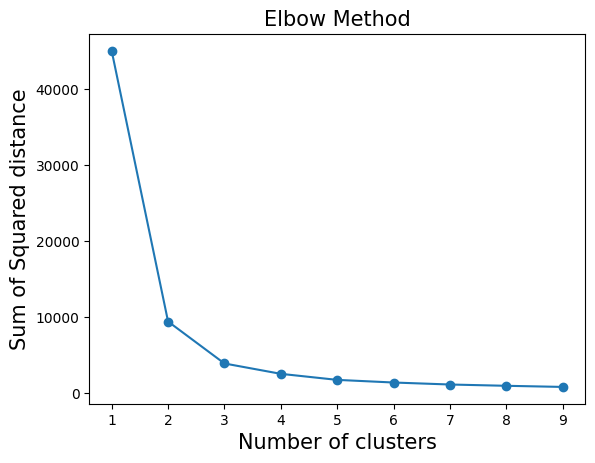

In [61]:
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(data)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

In [62]:
#Fitting kmeans model
kmeans = KMeans(n_clusters = 3,random_state = 111)
kmeans.fit(scaled_df)

c:\Users\Bora\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


KMeans(n_clusters=3, random_state=111)

In [63]:

kmeans_score=metrics.silhouette_score(scaled_df, kmeans.labels_)
metrics.silhouette_score(scaled_df, kmeans.labels_)


0.6315683677877135

## Support Vector Machine Model

In [64]:
from sklearn.preprocessing import LabelEncoder
Y=data[0]

encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
Y

array([  3,   1,   0,   2,  19,   7,   8,  13,   5,  32,  64,  74,  76,
        73,  73,  81,  44,  53,  56,  54,  59,  35,   9,   6,  24,  16,
        23,   4,  10,  45,  54,  43,  36,  33,  25,  26,  34,  37,  46,
        63,  67,  58,  62,  65,  52,  55,  57,  43,  21,  28,  30,  38,
        41,  20,  14,  17,  39,  29,  42,  51,  66,  49,  27,  11,  12,
        31,  50,  40,  22,  18,  15,  47,  60,  69,  83,  91,  85,  79,
        68,  77,  82,  93,  98,  94,  72,  71,  70,  78,  95, 103, 106,
       112, 125, 126, 124, 121, 122, 118, 119, 116, 113, 105, 109, 102,
        61,  48,  75,  89,  95,  96,  90,  80,  84,  97,  87,  88,  86,
        92,  99, 100, 101, 104, 107, 110, 108, 111, 114, 115, 117, 120,
       123, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137],
      dtype=int64)

In [65]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [67]:
#Fitting SVC Model
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.0


In [68]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.0


In [69]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.0


In [70]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.0


In [71]:
svc_score=metrics.accuracy_score(y_test,y_pred)

## Random Forest Regressor Model

In [72]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [73]:
Y=data[0]

In [74]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=1/3, random_state=0)

In [75]:
model = RandomForestRegressor()

In [76]:
#Preparing model
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 150, num = 11)]
min_samples_split = [2, 5, 10, 20]
min_samples_leaf = [1, 2, 4, 10, 20]
bootstrap = [True, False]

parametrs = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [77]:

rnd_search_cv = RandomizedSearchCV(model, parametrs, cv=5)

In [78]:
#Fitting model
rnd_search_cv.fit(xTrain, yTrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 24, 38, 52, 66, 80,
                                                      94, 108, 122, 136, 150],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10, 20],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [100, 147, 194, 242,
                                                         289, 336, 384, 431,
                                                         478, 526, 573, 621,
                                                         668, 715, 763, 810,
                                                         857, 905, 952, 1000]})

In [79]:
random_forest_score = rnd_search_cv.score(xTrain, yTrain)
print("R-squared:", random_forest_score) 
 


R-squared: 0.9921738866605943


In [80]:
#Creating scores table
scores=pd.DataFrame()
scores["Models"]=["Linear Regression","Decision Tree Regressor","K-Means Regressor","SVC","Random Forest Regressor"]
scores["Score"]=linear_regression_score,decision_tree_score,kmeans_score,svc_score,random_forest_score
scores

,Models,Score
0,Linear Regression,0.852000
1,Decision Tree Regressor,0.991945
2,K-Means Regressor,0.631568
3,SVC,0.000000
4,Random Forest Regressor,0.992174


### The Decision tree model gives a different score each time it runs, but when we take the average, we encounter results that are extremely close to the Random Forest Regressor model. As a result, we can say that these two models are the best model for inflation.
### Moreover,SVC model returned 0 because it is a classification model.